In [19]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
Npixeles=256
NI=4 #Images number RAW (each image was obtained by an statistics of 5E+8)
NF=4 #Images number FF
NThr=2 
nameP="Data"
nameI="Inline"
nameV="28kVp"
nameF="FilterAl"
nameD= "Dist3"
nameTF="FF"
nameTP="PlaqueS"
namePI="Dt0"
namePG="Dt0"
namePD="PData"
nameRAW=nameP+"/"+nameI+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+namePI+"/RAW" #RAW
nameFF=nameP+"/"+nameI+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTF+"/FF" # FF

In [21]:
def ImagenesR(name,Npixeles):
    I=[]
    for k in range(0,len(name),Npixeles*Npixeles):
        Im=np.zeros((Npixeles,Npixeles))
        for j in range(Npixeles):
            for i in range(Npixeles):
                Im[j,i]=name[i+Npixeles*j+k]
        I.append(Im)
    return I

In [22]:
def Imagenes(name,Npixeles,NI):
    D=[]
    for i in range(1,NI+1):
        Raw=np.fromfile(name+"{}.raw".format(i), dtype='float32')
        K=ImagenesR(Raw,Npixeles)
        D.append(K)
    return D

In [23]:
def ImagenesA(name,Npixeles,NI,NThr):
    A=[]
    for i in range(NThr):
        Mean=np.zeros((Npixeles, Npixeles))
        for j in range (NI):
            Mean=Mean+name[j][i]
        A.append(Mean)
    return A

In [24]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [25]:
def Aver(name,X1,X2,Step):
    P=np.copy(name)
    for i in range(len(P)):
        P[i,X1:X2]=(1/2)*(P[i,X1-Step:X2-Step]+P[i,X1+Step:X2+Step])
    return P

In [26]:
RAW=Imagenes(nameRAW,Npixeles,NI)
RAWA=ImagenesA(RAW,Npixeles,NI,NThr)
FF=Imagenes(nameFF,Npixeles,NF)
FFA=ImagenesA(FF,Npixeles,NF,NThr)

In [27]:
RAWC=[]
#RAWCN=[]
for i in range(NThr):
    RawC=RAWA[i]/FFA[i]
    RAWC.append(RawC)

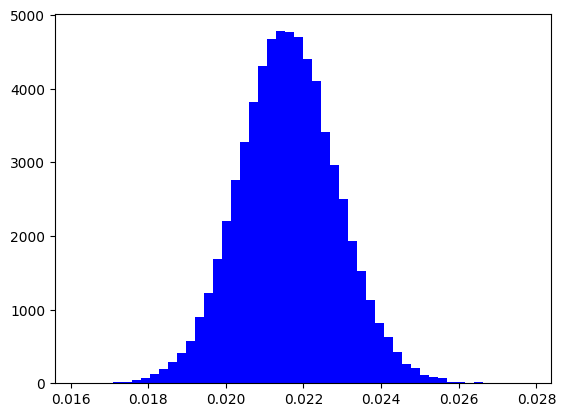

In [28]:
k=1
ImG=plt.hist(np.ravel(RAWC[k]),bins=50,color="blue")

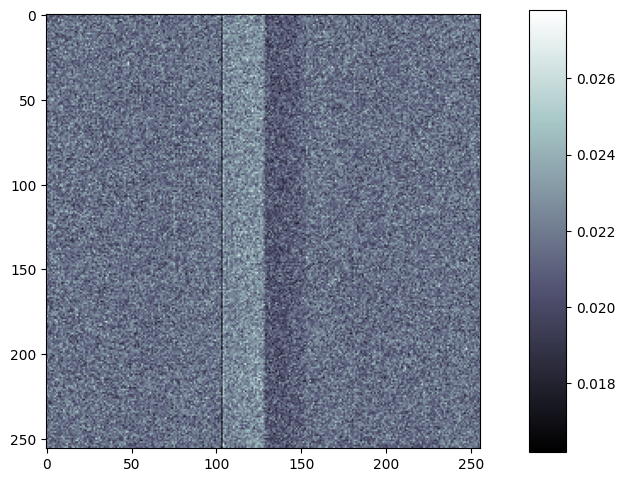

In [29]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(RAWC[k], cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)

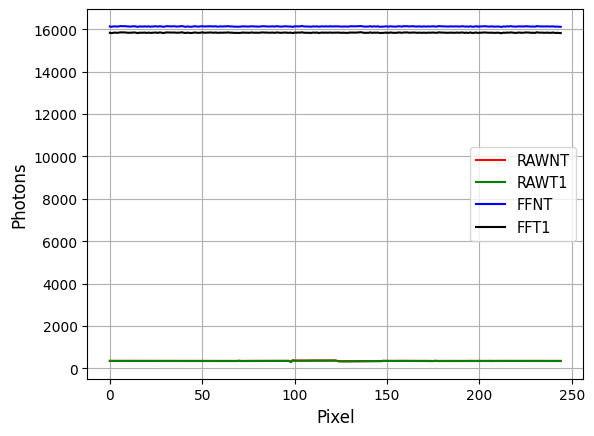

In [30]:
fig,ax=plt.subplots()
plt.plot(PI(RAWA[0][5:250,5:250],0,RAWA[0][5:250,5:250].shape[0],0,RAWA[0][5:250,5:250].shape[1]),label="RAWNT", color="red")
plt.plot(PI(RAWA[1][5:250,5:250],0,RAWA[1][5:250,5:250].shape[0],0,RAWA[1][5:250,5:250].shape[1]),label="RAWT1", color="green")
plt.plot(PI(FFA[0][5:250,5:250],0,FFA[0][5:250,5:250].shape[0],0,FFA[0][5:250,5:250].shape[1]),label="FFNT", color="blue")
plt.plot(PI(FFA[1][5:250,5:250],0,FFA[1][5:250,5:250].shape[0],0,FFA[1][5:250,5:250].shape[1]),label="FFT1", color="black")
plt.ylabel("Photons",fontsize=12)
plt.xlabel("Pixel",fontsize=12)
plt.grid()
plt.legend(loc=0, fontsize=10.5)

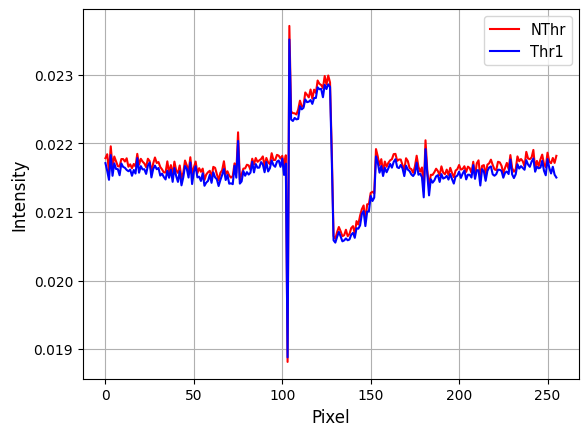

In [31]:
fig,ax=plt.subplots()
plt.plot(PI(RAWC[0],0,RAWC[0].shape[0],0,RAWC[0].shape[1]),label="NThr", color="red")
plt.plot(PI(RAWC[1],0,RAWC[1].shape[0],0,RAWC[1].shape[1]),label="Thr1", color="blue")
plt.ylabel("Intensity",fontsize=12)
plt.xlabel("Pixel",fontsize=12)
plt.grid()
#plt.ylim(0.65,1.1)
plt.legend(loc=0, fontsize=10.5)

In [ ]:
#np.savetxt(nameP+"/"+nameI+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+namePD+"/RAWS.txt",RAWC[k]) #II Image
#np.savetxt(nameP+"/"+nameI+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+namePI+"/"+namePD+"/RAWS.txt",RAWC[k]) #EI Image